# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

1. Descripción de los datos.

Primero voy a leer los archivos con .read_csv y analizar si necesitan alguna modificación, luego visualizar las primeras 5 líneas de cada DataFrame con .head() y, finalmente, analizar la info de cada DataFrame con .info()

In [63]:
# importar librerías
import pandas as pd

In [64]:
import os
os.listdir('Datasets_instacart')  # o 'datasets' si renombraste

['order_products.csv',
 'products.csv',
 'departments.csv',
 'instacart_orders.csv',
 'aisles.csv']

In [65]:
# leer conjuntos de datos en los DataFrames
orders = pd.read_csv('Datasets_instacart/instacart_orders.csv', sep=';')
products = pd.read_csv('Datasets_instacart/products.csv', sep=';')
aisles = pd.read_csv('Datasets_instacart/aisles.csv', sep=';')
departments = pd.read_csv('Datasets_instacart/departments.csv', sep=';')
order_products = pd.read_csv('Datasets_instacart/order_products.csv', sep=';')

In [66]:
# mostrar información del DataFrame
print(orders.head())
print()
orders.info()

   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12   

   days_since_prior_order  
0                    30.0  
1                     9.0  
2                     2.0  
3                    10.0  
4                    17.0  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-nu

In [67]:
# mostrar información del DataFrame
print(products.head())
print()
products.info()

   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [68]:
# mostrar información del DataFrame
print(aisles.head())
print()
aisles.info()

   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [69]:
# mostrar información del DataFrame
print(departments.head())
print()
departments.info()

   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [70]:
# mostrar información del DataFrame
print(order_products.head())
print()
order_products.info()

   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusiones

Conclusiones intermedias sobre el Paso 1. Descripción de los datos.

Los datos no estaban separados por comas, por lo que pandas no identificaba las columnas y no se podían visualizar ni analizar correctamente. Cambié el tipo de separador con el parámetro sep=';' para poder visualizar mejor los datos y así observar la cantidad de valores ausentes.

En el DataFrame orders la mayoría de las columnas tienen tipo de datos int., excepto la última que es float. También, hay valores ausentes en la columna 'days_since_prior_order'

En el DataFrame products hay valores ausentes en la columna 'products_name'

En el DataFrame order_products el tipo de datos para la columna 'add_to_cart_order' están en float, no creo que afecte el análisis, pero tal vez debería estar en int.

Los demas DataFrames no presentan problema alguno.

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

## Plan de solución

Paso 2. Preprocesamiento de los datos.

Primero identificaré los valores duplicados con .duplicated().sum(), luego analizaré los valores completamente duplicados y los eliminaré con .drop_duplicates().

Después identificaré los valores ausentes con isna().sum() y los rellenearé, según la naturaleza de los datos, con fillna()

## Encuentra y elimina los valores duplicados.

### `orders` data frame

In [71]:
# Revisa si hay pedidos duplicados
print(orders.duplicated().sum())
orders[orders.duplicated()]

15


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


Hay 15 duplicados y tienen en común el día (miércoles) y la hora (2 am)

In [72]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
print(orders.query('order_dow == 3 and order_hour_of_day == 2'))

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

El resultado indica que hay 121 líneas de datos para ese día y hora (miércoles a las 2 am) y sólo 15 de ellos están repetidos, por lo que es poco más del 10% de los datos para ese filtro. Pudo haber sido alguna pequeña falla del sistema o un error humano.

In [73]:
# Elimina los pedidos duplicados
orders.drop_duplicates(inplace=True)

In [74]:
# Vuelve a verificar si hay filas duplicadas
orders.duplicated().sum()

np.int64(0)

In [75]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
orders['order_id'].duplicated().sum()

np.int64(0)

Eliminé las filas que estaban completamente duplicadas, las cuales coincidían con el día (miércoles) y hora (2 am).
Al verificar si hay IDs duplicados de pedidos obtuve 0, lo que indica que ya no hay pedidos duplicados.

### `products` data frame

In [76]:
# Verifica si hay filas totalmente duplicadas
products.duplicated().sum()

np.int64(0)

In [77]:
# Revisa únicamente si hay ID de productos duplicados
products['product_id'].duplicated().sum()

np.int64(0)

In [78]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products['product_name'] = products['product_name'].str.upper()

products['product_name'].duplicated().sum()

np.int64(1361)

In [79]:
# Revisa si hay nombres duplicados de productos no faltantes
products['product_name'].dropna().duplicated().sum()

np.int64(104)

Hay 104 nombres de productos duplicados; sin embargo, tienen diferente 'product_id', por lo que al revisar si hay 'product_id' duplicados, se obtiene 0. 
Es posible que sean diferentes presentaciones del mismo producto o que el mismo producto se haya registrado con diferente ID.
Decidí dejar esos productos así para no eliminar datos y afectar el análisis futuro.

### `departments` data frame

In [80]:
# Revisa si hay filas totalmente duplicadas
departments.duplicated().sum()

np.int64(0)

In [81]:
# Revisa únicamente si hay IDs duplicadas de departamentos
departments['department_id'].duplicated().sum()

np.int64(0)

No hay duplicados en filas completas ni en la columna 'department_id'

### `aisles` data frame

In [82]:
# Revisa si hay filas totalmente duplicadas
aisles.duplicated().sum()

np.int64(0)

In [83]:
# Revisa únicamente si hay IDs duplicadas de pasillos
aisles['aisle_id'].duplicated().sum()

np.int64(0)

Tampoco hay duplicados totales por fila ni por la columna 'aisle_id'

### `order_products` data frame

In [84]:
# Revisa si hay filas totalmente duplicadas
order_products.duplicated().sum()

np.int64(0)

In [85]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
order_id_duplicado = order_products['order_id'].duplicated().sum()
product_id_duplicado = order_products['product_id'].duplicated().sum()
print(f'Hay {order_id_duplicado} order_id duplicados y {product_id_duplicado} product_id duplicados')

Hay 4094961 order_id duplicados y 4499434 product_id duplicados


Al verificar si hay IDs duplicados de pedidos, obtuve que hay 4,094,961 filas en las que el 'order_id' ya había aparecido antes, lo que indica que el cliente pidió más de un producto en esa orden. Lo mismo sucede con 'product_id', pues indica que hay 4,499,434 filas donde ya había aparecido antes, pero eso significa que dichos productos aparecen varias veces en diferentes órdenes. 

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [86]:
# Encuentra los valores ausentes en la columna 'product_name'
products['product_name'].isna().sum()

np.int64(1258)

Hay 1,258 valores ausentes en la columna 'product_name' del DF products

In [87]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
missing_rows = products[products['product_name'].isna()]
todos_en_100 = (missing_rows['aisle_id'] == 100).all()
print(todos_en_100)

True


Todos los valores ausentes están en el pasillo con ID 100

In [88]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
missing_rows = products[products['product_name'].isna()]
todos_en_21 = (missing_rows['department_id'] == 21).all()
print(todos_en_21)

True


Todos los valores ausentes están relacionados con el departamento con ID 21

In [89]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
dep_21 = departments.query("department_id == 21")
aisle_100 = aisles.query("aisle_id == 100")

print(dep_21)
print()
print(aisle_100)

    department_id department
20             21    missing

    aisle_id    aisle
99       100  missing


No existe información para el departamento 21 ni para el pasillo 100.

In [90]:
# Completa los nombres de productos ausentes con 'Unknown'
products['product_name'] = products['product_name'].fillna('Unknown')
products['product_name'].isna().sum()

np.int64(0)

Rellené los nombres faltantes con 'Unknown' y verifiqué si había quedado algún valor ausente en esa columna. 

### `orders` data frame

In [91]:
# Encuentra los valores ausentes
orders.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [92]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
anomalias = orders[(orders['order_number'] != 1) & (orders['days_since_prior_order'].isna())]
print(f"Cantidad de valores ausentes incorrectos: {len(anomalias)}")

orders['days_since_prior_order'] = orders['days_since_prior_order'].fillna(-1)
orders['days_since_prior_order'].isna().sum()

Cantidad de valores ausentes incorrectos: 0


np.int64(0)

Todos los valores ausentes se encuentran en el primer pedido del cliente dado que no hay un registro previo. Decidí rellenar los valores ausentes con -1 para no ensuciar los datos, ya que 0 indica que el cliente hizo una orden ese día.

### `order_products` data frame

In [93]:
# Encuentra los valores ausentes
order_products.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [94]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
valor_min = order_products['add_to_cart_order'].min()
valor_max = order_products['add_to_cart_order'].max()

print(f'El valor mínimo es {valor_min}, y el valor máximo es {valor_max}')

El valor mínimo es 1.0, y el valor máximo es 64.0


Hay 836 valores ausentes para la columna 'add_to_cart_order', esto significa que dichos productos no tienen un orden secuencial en el que fueron agregados al carrito. Podrían rellenarse esos valores con un número muy alto o con uno negativo.

In [95]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
missing_cart_orders = order_products[order_products['add_to_cart_order'].isna()]

In [96]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
conteo_por_pedido = order_products[order_products['order_id'].isin(missing_cart_orders['order_id'])].groupby('order_id')['product_id'].count().min()

Todos los pedidos con valores ausentes en la columna 'add_to_cart_order' tienen un mínimo de 65 productos.

In [97]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999)
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype('int')
order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB


Los valores ausentes por orden no superan los 63 productos, por los que fueron sustituidos por '999', de manera que no ensucian los datos para el análisis. También, no tenía sentido que fueran valores flotantes ya que se compran productos enteros, por lo que se cambió el tipo de dato con .astype() 

## Conclusiones

Primero busqué los valores completamente duplicados con .duplicated().sum() para analizar e hipotizar porqué están duplicados. Después, los eliminé con .drop_duplicates(inplace=True) para los datos se guardaran en el mismo DataFrame. Únicamente encontré valores duplicados en los DataFrames orders, products y order_products. Sin embargo, en este último los valores duplicados que aparecieron eran en la columna ‘order_id’ y ‘product_id’, lo cual es de esperarse porque indica que un cliente ha realizado varios pedidos y que los productos se han pedido varias veces.

Luego, busqué los valores ausentes. En el DataFrame products había valores ausentes en la columna ‘product_name’, los cuales coinciden con el pasillo con id 100 y el departamento con id 21 ya que no hay información para dicho pasillo y departamento. Por ende, dichos productos se rellenaron con ‘unknown’. Por otra parte, el DF orders tenía valores ausentes en la columna ‘days_since_prior_order’ ya que no hay registro de pedidos previos para dichos clientes, estos datos se rellenaron con -1 para no ensuciar los datos. Asimismo, en el DF order_products, los valores ausentes se encontraban en la columna ‘add_to_cart_order’, esto significa que dichos productos no tiene un orden secuencial en el que fueron agregados al carrito. Como los valores ausentes no superan los 63 productos, se remplazo ese valor ausente con 999 y el tipo de dato se cambió a int.

En suma, se realizó la limpieza y procesamiento de datos para que estuvieran listos para el análisis y que éste no se viera afectado.

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [98]:
fuera_de_horas = orders.query("order_hour_of_day < 0 or order_hour_of_day > 23")
print('Pedidos con día fuera de rango', len(fuera_de_horas))

Pedidos con día fuera de rango 0


In [99]:
fuera_de_dias = orders.query("order_dow < 0 or order_dow > 6")
print('Pedidos con día fuera de rango', len(fuera_de_dias))

Pedidos con día fuera de rango 0


Las horas y los días son razonables. Las horas no pasan de 23 y los días de 6.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

In [100]:
ordenes_hora_dia = orders.groupby('order_hour_of_day')['order_dow'].count()
print(ordenes_hora_dia)

order_hour_of_day
0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: order_dow, dtype: int64


Las horas con mayores compras están entre las 9 am y las 17, la hora más fuerte es a las 10 am.

### [A3] ¿Qué día de la semana compran víveres las personas?

In [101]:
compras_dia = orders.groupby('order_dow')['order_id'].count()
print(compras_dia)

order_dow
0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: order_id, dtype: int64


Los días que más se realizan compras son los domingos y lunes, el día con menos compras es el jueves.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

In [102]:
tiempo_espera_min = orders['days_since_prior_order'].min()
tiempo_espera_max = orders['days_since_prior_order'].max()
print('El tiempo de espera mínimo para realizar otro pedido es de', tiempo_espera_min)
print('El tiempo de espera máximo para realizar otro pedido es de', tiempo_espera_max)

El tiempo de espera mínimo para realizar otro pedido es de -1.0
El tiempo de espera máximo para realizar otro pedido es de 30.0


Las personas tradan un mínimo de 0 días, es decir, en el mismo día vuelven a realizar un pedido y un máximo de 30 días. El -1 obtenido son los valores que estaban ausentes del DF.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [103]:
ordenes_miercoles = orders[orders['order_dow'] == 3]['order_hour_of_day']
miercoles_counts = ordenes_miercoles.value_counts().sort_index()

In [104]:
ordenes_sabado = orders[orders['order_dow'] == 6]['order_hour_of_day']
sabado_counts = ordenes_sabado.value_counts().sort_index()

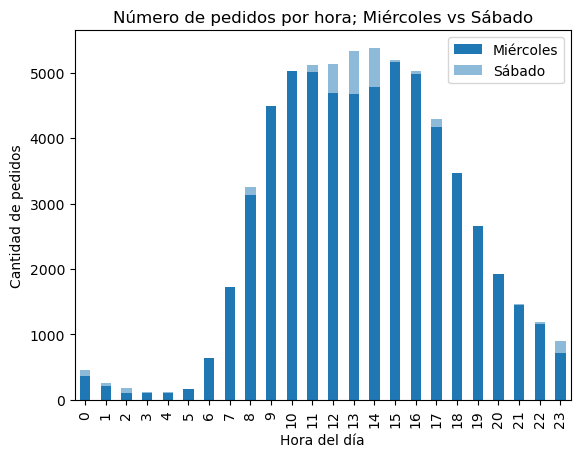

In [105]:
from matplotlib import pyplot as plt
miercoles_counts.plot(kind='bar', xlabel= 'Hora del día', ylabel= 'Cantidad de pedidos', title= 'Número de pedidos por hora; Miércoles vs Sábado')
sabado_counts.plot(kind='bar', xlabel= 'Hora del día', ylabel= 'Cantidad de pedidos', title= 'Número de pedidos por hora; Miércoles vs Sábado', alpha=0.5)
plt.legend(['Miércoles', 'Sábado'])
plt.show()

Ambos días tiene una distribución similar, de 11 a 14hrs hay significativamente más pedidos los días sábados que los miércoles 

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [106]:
pedidos_por_cliente = orders['user_id'].value_counts()
distribucion_pedidos = pedidos_por_cliente.value_counts().sort_index()

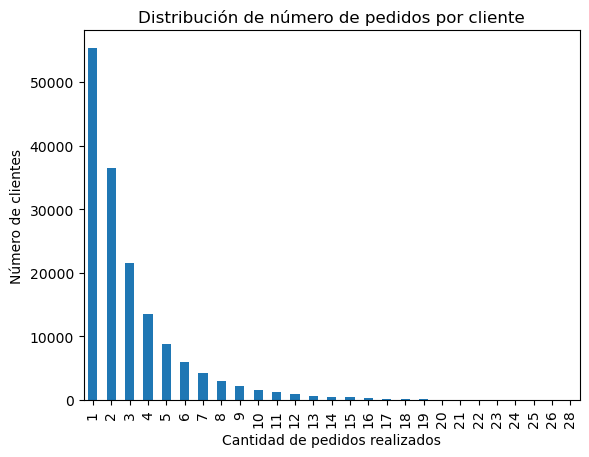

In [107]:
distribucion_pedidos.plot(kind='bar', xlabel='Cantidad de pedidos realizados', ylabel='Número de clientes', title='Distribución de número de pedidos por cliente')
plt.show()

Hay más de 5 mil clientes que han realizado únicamente un pedido. Hay muy pocos clientes que han realizado de 20 a 28 pedidos.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [108]:
ventas_por_producto_con_nombre = order_products.merge(products, on='product_id')

In [109]:
ventas_por_producto = ventas_por_producto_con_nombre.groupby(['product_id', 'product_name'])['order_id'].count()
ventas_por_producto = ventas_por_producto.sort_values(ascending=False).head(20)
ventas_por_producto = ventas_por_producto.reset_index(name='total_orders')
print(ventas_por_producto)

    product_id              product_name  total_orders
0        24852                    BANANA         66050
1        13176    BAG OF ORGANIC BANANAS         53297
2        21137      ORGANIC STRAWBERRIES         37039
3        21903      ORGANIC BABY SPINACH         33971
4        47209      ORGANIC HASS AVOCADO         29773
5        47766           ORGANIC AVOCADO         24689
6        47626               LARGE LEMON         21495
7        16797              STRAWBERRIES         20018
8        26209                     LIMES         19690
9        27845        ORGANIC WHOLE MILK         19600
10       27966       ORGANIC RASPBERRIES         19197
11       22935      ORGANIC YELLOW ONION         15898
12       24964            ORGANIC GARLIC         15292
13       45007          ORGANIC ZUCCHINI         14584
14       39275       ORGANIC BLUEBERRIES         13879
15       49683            CUCUMBER KIRBY         13675
16       28204        ORGANIC FUJI APPLE         12544
17        

El producto más vendido es "banana" con un total de 66050 ventas, mientras que el producto menos vendido de este top20 es "organic grape tomatoes" con un total de 11781 ventas. Dentro de los 20 productos más vendidos, la mayoría son orgánicos.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [110]:
productos_por_pedido = order_products.groupby('order_id')['product_id'].count()
distribucion_productos_por_pedido = productos_por_pedido.value_counts().sort_index()

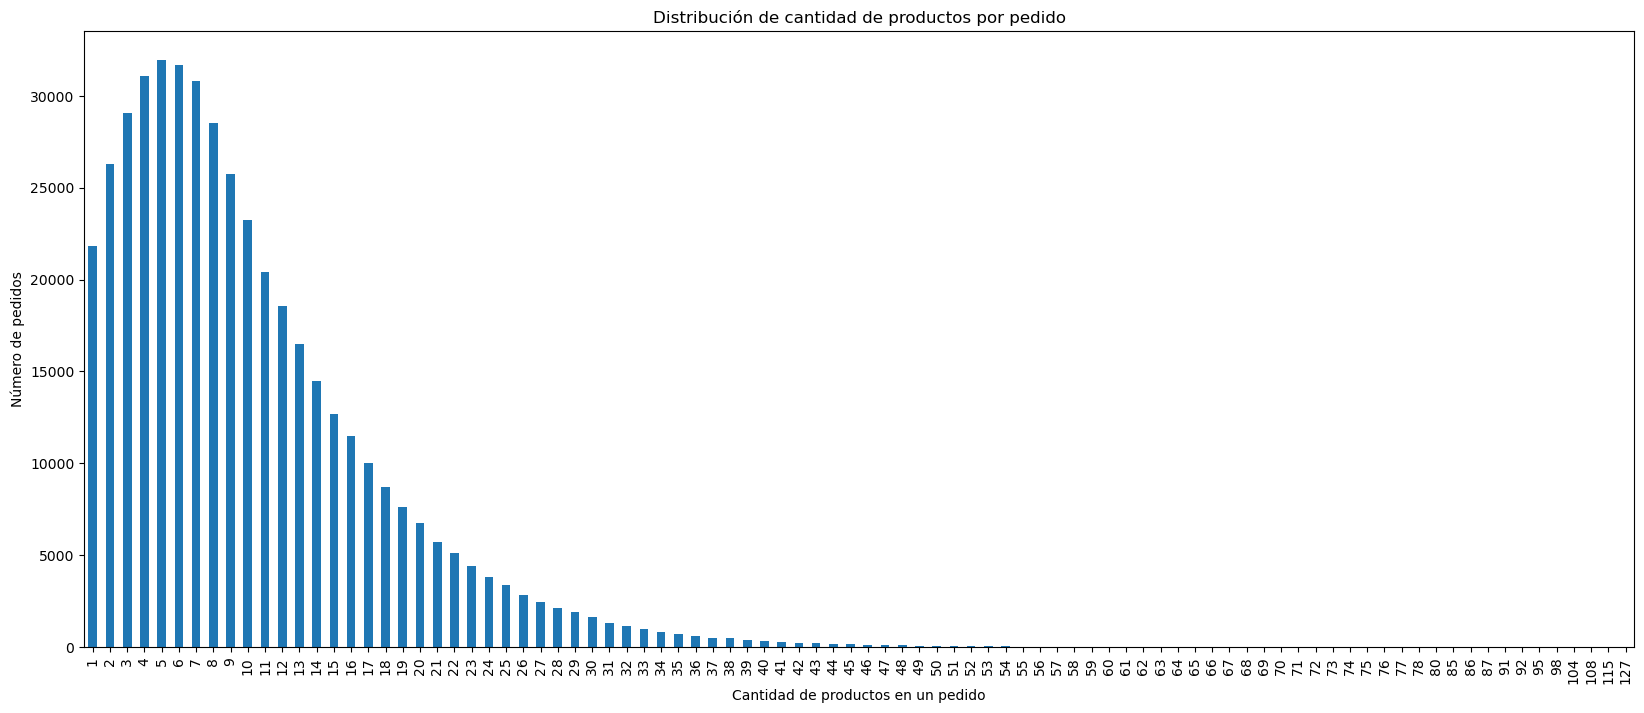

In [111]:
distribucion_productos_por_pedido.plot(kind='bar',
                                       ylabel='Número de pedidos',
                                       xlabel='Cantidad de productos en un pedido',
                                       title='Distribución de cantidad de productos por pedido',
                                       rot=90,
                                      figsize= (20,8))
plt.show()

Hay entre 20,000 y más de 30,000 números de pedidos que ordenan alrededor de 1 a 11 productos.
A partir de 12 productos el número de productos ordenados por pedido va disminuyendo hasta llegar a 127 productos en un pedido.
Mientras más cantidad de productos se ordenan, menor es el número de pedidos.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [112]:
productos_mas_reordenados = ventas_por_producto_con_nombre.groupby(['product_id', 'product_name'])['reordered'].sum()
top_20_productos_reordenados = productos_mas_reordenados.sort_values(ascending=False).head(20)
top_20_productos_reordenados = top_20_productos_reordenados.reset_index(name='total_reorders')
print(top_20_productos_reordenados)

    product_id              product_name  total_reorders
0        24852                    BANANA           55763
1        13176    BAG OF ORGANIC BANANAS           44450
2        21137      ORGANIC STRAWBERRIES           28639
3        21903      ORGANIC BABY SPINACH           26233
4        47209      ORGANIC HASS AVOCADO           23629
5        47766           ORGANIC AVOCADO           18743
6        27845        ORGANIC WHOLE MILK           16251
7        47626               LARGE LEMON           15044
8        27966       ORGANIC RASPBERRIES           14748
9        16797              STRAWBERRIES           13945
10       26209                     LIMES           13327
11       22935      ORGANIC YELLOW ONION           11145
12       24964            ORGANIC GARLIC           10411
13       45007          ORGANIC ZUCCHINI           10076
14       49683            CUCUMBER KIRBY            9538
15       28204        ORGANIC FUJI APPLE            8989
16        8277  APPLE HONEYCRIS

Escribe aquí tus conclusiones

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [113]:
ventas_por_producto_con_nombre = order_products.merge(products, on='product_id')
ventas_por_producto = ventas_por_producto_con_nombre.groupby(['product_id', 'product_name'])['order_id'].count()
productos_mas_reordenados = ventas_por_producto_con_nombre.groupby(['product_id', 'product_name'])['reordered'].sum()
proporcion_reorden = productos_mas_reordenados / ventas_por_producto
proporcion_reorden = proporcion_reorden.reset_index(name='proporcion_reorden')
proporcion_reorden = proporcion_reorden.sort_values('proporcion_reorden', ascending=False)

print(proporcion_reorden.head(10))

       product_id                                       product_name  \
13453       14721                            BONE STRENGTH TAKE CARE   
19195       20949                           VANILLA SANDWICH COOKIES   
6136         6723                                   PALMIERS- PETITE   
6144         6732                  NATURALLY SPARKLING MINERAL WATER   
41319       45088  CALIFORNIA DILL POLLEN & GARLIC GOAT CHEESE & ...   
41310       45078                                       POMEGRANATEA   
19258       21016       PARCHMENT LINED 8 IN X 3.75 IN X 2.5 IN PANS   
19248       21005                        PEANUT BUTTER PIE ICE CREAM   
32273       35192                         CHOCOLATE SOY MILK SINGLES   
32277       35197  MOCHA CHOCOLATE CHIP  ORGANIC NON-DAIRY FROZEN...   

       proporcion_reorden  
13453                 1.0  
19195                 1.0  
6136                  1.0  
6144                  1.0  
41319                 1.0  
41310                 1.0  
19258      

In [114]:
bajo_a_medio = proporcion_reorden.query("proporcion_reorden >= 0 and proporcion_reorden <= 0.5")
medio_a_alto = proporcion_reorden.query("proporcion_reorden > 0.5 and proporcion_reorden <= 1")

print(f'Hay {len(bajo_a_medio)} productos cuya proporción de las veces que se pide y que se vuelve a pedir es de baja a media')
print(f'Hay {len(medio_a_alto)} productos cuya proporción de las veces que se pide y que se vuelve a pedir es de media a alta')
print()
print('El total de productos es', order_products['product_id'].nunique())

Hay 30384 productos cuya proporción de las veces que se pide y que se vuelve a pedir es de baja a media
Hay 15189 productos cuya proporción de las veces que se pide y que se vuelve a pedir es de media a alta

El total de productos es 45573


In [115]:
total_productos = len(bajo_a_medio) + len(medio_a_alto)
print('El total de prodcutos es', total_productos)
print()

porcentaje_reorden_bajo_medio = len(bajo_a_medio) / total_productos *100
porcentaje_reorden_medio_alto = len(medio_a_alto) / total_productos *100
print(f'El {porcentaje_reorden_bajo_medio}% de los productos tiene una proporción de reorden de baja a media.')
print(f'El {porcentaje_reorden_medio_alto}% de los productos tiene una proporción de reorden de media a alta.')

El total de prodcutos es 45573

El 66.67105523007044% de los productos tiene una proporción de reorden de baja a media.
El 33.328944769929564% de los productos tiene una proporción de reorden de media a alta.


Hay 30,384 productos con una proporción de reorden de baja a media, es decir, que va de 0 a 0.5.
Hay 15,189 productos con una proporción de reorden de media a lata, es decir, que va de 0.51 a 1.
El 66.7% de los productos tienen una proporción de reorden de baja a media.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [116]:
ordenes_detalle = orders.merge(order_products, on='order_id')
total_productos = ordenes_detalle.groupby('user_id')['product_id'].count()
total_reordenes = ordenes_detalle.groupby('user_id')['reordered'].sum()
proporcion_por_usuario = (total_reordenes / total_productos).reset_index(name='proporcion_reordenados')
proporcion_por_usuario.sort_values('proporcion_reordenados', ascending=False, inplace=True)

print(proporcion_por_usuario)

        user_id  proporcion_reordenados
99672    137587                     1.0
125732   173474                     1.0
10138     13918                     1.0
45067     62300                     1.0
45074     62307                     1.0
...         ...                     ...
138474   190953                     0.0
86539    119371                     0.0
45695     63173                     0.0
45689     63163                     0.0
120146   165726                     0.0

[149626 rows x 2 columns]


In [117]:
proporcion_producto_baja_media = proporcion_por_usuario.query("proporcion_reordenados >= 0 and proporcion_reordenados <= 0.5")
proporcion_producto_media_alta = proporcion_por_usuario.query("proporcion_reordenados > 0.5 and proporcion_reordenados <= 1")

total_clientes = ordenes_detalle['user_id'].nunique()

porcentaje_cliente_bajo_medio = len(proporcion_producto_baja_media) / total_clientes *100
porcentaje_cliente_medio_alto = len(proporcion_producto_media_alta) / total_clientes *100

print(f'Hay {total_clientes} clientes en total, de los cuales:\n El {porcentaje_cliente_bajo_medio}%, es decir, {len(proporcion_producto_baja_media)} clientes, tienen una proporción baja a media de productos reordenados. \n El {porcentaje_cliente_medio_alto}%, es decir, {len(proporcion_producto_media_alta)} clientes, tienen una proporción media a alta de productos reordenados.')

Hay 149626 clientes en total, de los cuales:
 El 50.18379158702364%, es decir, 75088 clientes, tienen una proporción baja a media de productos reordenados. 
 El 49.81620841297635%, es decir, 74538 clientes, tienen una proporción media a alta de productos reordenados.


El comportamiento de los clientes está casi igual:
El 50.2% de los clientes tienden a comprar cosas nuevas en cada pedido
El 49.9% de los clientes tiende a repetir productos

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [118]:
primeros_productos = ventas_por_producto_con_nombre[ventas_por_producto_con_nombre['add_to_cart_order'] == 1]
conteo_primeros_productos = primeros_productos[['product_id', 'product_name']].value_counts().head(20)
top_20_primero = conteo_primeros_productos.reset_index(name='veces_agregado_primero')
print(top_20_primero)

    product_id                 product_name  veces_agregado_primero
0        24852                       BANANA                   15562
1        13176       BAG OF ORGANIC BANANAS                   11026
2        27845           ORGANIC WHOLE MILK                    4363
3        21137         ORGANIC STRAWBERRIES                    3946
4        47209         ORGANIC HASS AVOCADO                    3390
5        21903         ORGANIC BABY SPINACH                    3336
6        47766              ORGANIC AVOCADO                    3044
7        19660                 SPRING WATER                    2336
8        16797                 STRAWBERRIES                    2308
9        27966          ORGANIC RASPBERRIES                    2024
10       44632   SPARKLING WATER GRAPEFRUIT                    1914
11       49235          ORGANIC HALF & HALF                    1797
12       47626                  LARGE LEMON                    1737
13         196                         SODA     

Dentro del top 20 de los productos que los usuarios agregan primero en las ordenes, el producto "Banana" es el más agregado, pues en 15,562 ocasiones es el primer producto en agregarse. Mientras que el producto "Raspberries" se agrega en 1,246 ocasiones al inicio de una compra.

### Conclusion general del proyecto:

Una vez hecha la limpieza y procesamiento de los datos, se puede pasar al análisis de los mismos, donde se encontró que:
Los días que más compras se realizan son los domingos y los lunes, mientras que los jueves es cuando menos compran se hacen. El tiempo de espera para que un cliente vuelva a comprar oscila entre 0 y 30 días, esto quiere decir que pueden comprar el mismo día o 30 días después de su última compra. 
Por otra parte, los miércoles y sábados tienen un número de compras bastante similar; sin embargo, los sábados hay más compras entre las 11 y las 17 horas. 
La mayoría de los clientes, más de 50,000, han realizado sólo un pedido. Mientras el número de pedidos aumenta, el número de clientes disminuye.
Dentro de los 20 productos más populares, la mayoría son orgánicos. 
En la mayoría de los pedidos se compran entre 1 y 12 productos, 5 productos es lo más común.
El 66.7% de los productos tienen una proporción de reorden de baja a media, esto significa que se compra el producto una vez y pocas veces se vuelve a comprar. 
El 50.2% de los clientes vuelve a comprar los mismo productos, esto es poco más de la mitad de los clientes.